In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)


In [125]:
df = pd.read_csv("./doc.csv")
df_additional = pd.read_csv("./usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")
merged = [y for _, y in df.groupby('firm', as_index=False)]

In [126]:

# firm size measures: 

for i in range(len(merged)): 

    merged[i]['lprice'] = merged[i].groupby(['firm'])['adjprice'].shift(4)
    merged[i]['r'] = np.log(merged[i]['adjprice'].astype(float)) - np.log(merged[i]['lprice'].astype(float))
    merged[i]['r2'] = np.log(merged[i]['adjprice'].astype(float)) - np.log(merged[i].groupby(['firm'])['adjprice'].shift(4).astype(float))
    merged[i].loc['ADT':'ADTN',['adjprice','lprice','r','r2']].iloc[85:96,]

    merged[i]['book_value'] = (merged[i]['totalassets'] - merged[i]['totalliabilities']  )
    merged[i]['market_value'] = (merged[i]['adjprice'].max() * merged[i]['stockholderequity'] )
    x = (merged[i]['originalprice'] * merged[i]['sharesoutstanding'] )

    #profit margin measures
    merged[i]['operating_profit'] = (merged[i]['revenue'] - merged[i]['cogs'] - merged[i]['sgae'])
    merged[i]['ebit'] = (merged[i]['revenue'] - merged[i]['cogs'] - merged[i]['sgae'] - merged[i]['otheropexp'])
    merged[i]['operating_profit_margin'] =  ( merged[i]['ebit'] / merged[i]['revenue'] )


In [127]:



for i in range(len(merged)): 
    df = merged[i].tail(4)

    dummy = merged[i].tail(1)
    
    totalassets = list(dummy['totalassets'])[0]
    totalliabilities = list(dummy['totalliabilities'])[0]
    shortdebt = list(dummy['shortdebt'])[0]
    longdebt = list(dummy['longdebt'])[0]
    stockholderequity = list(dummy['stockholderequity'])[0]
    adjprice = list(dummy['adjprice'])[0]
    originalprice = list(dummy['originalprice'])[0]
    book_value = list(dummy['book_value'])[0]
    market_value = list(dummy['market_value'])[0]
    operating_profit = list(dummy['operating_profit'])[0]
    ebit = list(dummy['ebit'])[0]
    operating_profit_margin = list(dummy['operating_profit_margin'])[0]
    sharesoutstanding = list(dummy['sharesoutstanding'])[0]
    naics = list(dummy['Sector NAICS\nlevel 1'])[0]
    Name = list(dummy['Name'])[0]
    newDf = df.groupby('firm', as_index=False).agg({'revenue':'sum', 'cogs':'sum', 'cogs':'sum', 'sgae':'sum', 'otheropexp':'sum', 'extraincome':'sum', 'finexp':'sum', 'incometax': 'sum'}) 


    newDf['totalassets'] = totalassets
    newDf['totalliabilities'] = totalliabilities
    newDf['shortdebt'] = shortdebt
    newDf['longdebt'] = longdebt
    newDf['stockholderequity'] = stockholderequity
    newDf['adjprice'] = adjprice
    newDf['originalprice'] = originalprice
    newDf['sharesoutstanding'] = sharesoutstanding
    newDf['book_value'] = book_value
    newDf['market_value'] = market_value
    newDf['operating_profit'] = operating_profit
    newDf['operating_profit_margin'] = operating_profit_margin
    newDf['ebit'] = ebit
    newDf['Sector NAICS\nlevel 1'] = naics
    newDf['Name'] = Name

    merged[i] = newDf
    

In [128]:
collapsed_dataframes = pd.DataFrame()
for df in merged:
    collapsed_dataframes = collapsed_dataframes.append(df, ignore_index=True)
collapsed_dataframes

,firm,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,adjprice,originalprice,sharesoutstanding,book_value,market_value,operating_profit,operating_profit_margin,ebit,Sector NAICS\nlevel 1,Name
0,A,6527000.0,3004000.0,2.056000e+06,0.0,41000.000000,81000.000,164000.0,1.045500e+07,5.333000e+06,...,118.560000,118.7700,298708.056,5122000.000,8.139299e+08,3.600000e+05,0.224020,3.600000e+05,Manufacturing,"Agilent Technologies, Inc"
1,AA,13386000.0,9653000.0,8.930000e+05,1138000.0,271000.000000,141000.000,869000.0,1.570900e+07,8.417000e+06,...,45.487956,45.5800,184448.686,7292000.000,6.540498e+08,6.570000e+05,0.200878,7.320000e+05,Manufacturing,Alcoa Corp
2,AAIC,31855.0,15523.0,0.000000e+00,0.0,-10809.000000,0.000,4333.0,1.084755e+06,8.710570e+05,...,3.250000,3.2500,35016.392,213698.000,2.172580e+07,4.526000e+03,0.415229,4.526000e+03,Finance and Insurance,Arlington Asset Investment Corp
3,AAL,40717000.0,0.0,4.160800e+07,0.0,251000.000000,1828000.000,-546000.0,6.796300e+07,7.638500e+07,...,12.680000,12.6800,649514.848,-8422000.000,-4.279606e+08,1.017000e+06,0.075771,1.017000e+06,Transportation and Warehousing,American Airlines Group Inc
4,AAME,195299.0,0.0,1.915230e+05,0.0,0.000000,0.000,863.0,3.792740e+05,2.701730e+05,...,2.670000,2.6700,20398.497,109101.000,5.262433e+05,-2.115000e+03,-0.047348,-2.115000e+03,Finance and Insurance,Atlantic American Corp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602,ZVIA,156702.0,93921.0,8.744600e+04,94595.0,51341.000000,0.000,55.0,1.127380e+05,2.553900e+04,...,2.810000,2.8100,67209.461,87199.000,1.003660e+06,-6.700000e+03,-0.323723,-1.474300e+04,Manufacturing,Zevia Pbc
3603,ZVO,230001.0,149303.0,1.118000e+05,5753.0,-3980.000000,0.000,98.0,8.543300e+04,7.882800e+04,...,0.970100,0.9701,34095.968,6605.000,1.651250e+05,-9.723000e+03,-0.016368,-8.410000e+02,Educational Services,Zovio Inc
3604,ZWS,340300.0,195100.0,1.196000e+05,3400.0,50400.000000,22000.000,-13700.0,1.176300e+06,9.469000e+05,...,27.179735,27.2400,125967.533,229400.000,8.315018e+06,5.380000e+04,0.188248,5.350000e+04,Manufacturing,Zurn Elkay Water Solutions Corp
3605,ZY,14546.0,48949.0,2.327660e+05,69138.0,-2028.000000,26572.000,44.0,4.709680e+05,2.343450e+05,...,1.230000,1.2300,103140.755,236623.000,9.467286e+06,-6.573600e+04,-40.317388,-1.061960e+05,"Professional, Scientific, and Technical Services",Zymergen Inc


What is the composition of US public firms in terms of size, sales performance and profitability?



Why some firms are more profitable than others? Which factors/variables are related to profitability?

Show how many firms by industry there are in the sample

In [129]:
firms_by_industry = collapsed_dataframes.groupby('Sector NAICS\nlevel 1')
firms_by_industry = pd.DataFrame(firms_by_industry['Sector NAICS\nlevel 1'].count().sort_values(ascending=False))
firms_by_industry = firms_by_industry.rename(columns={"Sector NAICS\nlevel 1": "# firms"})
firms_by_industry.reset_index()


,Sector NAICS\nlevel 1,# firms
0,Manufacturing,1565
1,Finance and Insurance,701
2,Information,261
3,Retail Trade,152
4,"Professional, Scientific, and Technical Services",145
5,Administrative and Support and Waste Managemen...,133
6,"Mining, Quarrying, and Oil and Gas Extraction",103
7,Wholesale Trade,79
8,Utilities,77
9,Accommodation and Food Services,69


For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

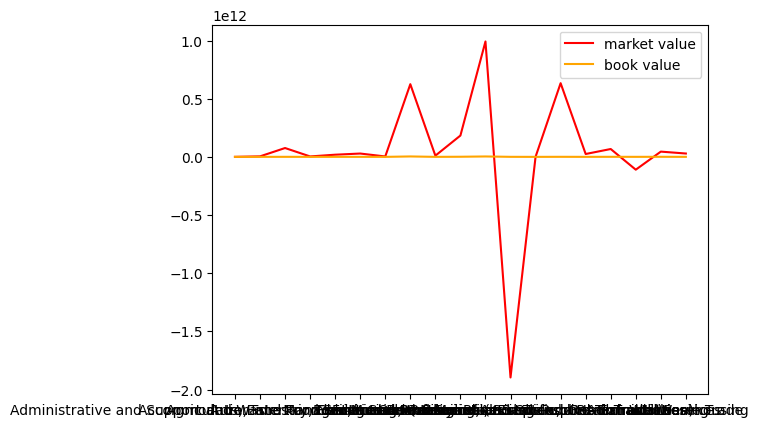

In [130]:


industries_market_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['market_value'].agg('sum'))
industries_book_value = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['book_value'].agg('sum'))


industries_market_value = industries_market_value.reset_index()
industries_book_value = industries_book_value.reset_index()


x = industries_market_value['Sector NAICS\nlevel 1']
y = industries_market_value['market_value']

x2 = industries_book_value['Sector NAICS\nlevel 1']
y2 = industries_book_value['book_value']

plt.plot(x,y, color="red")
plt.plot(x2,y2,color ='orange')
plt.legend(['market value', 'book value'])



For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

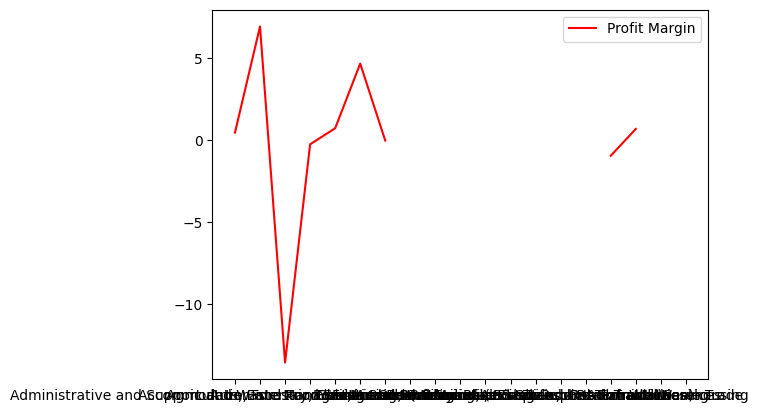

In [131]:
industries_profit_margin = pd.DataFrame(collapsed_dataframes.groupby(['Sector NAICS\nlevel 1'])['operating_profit_margin'].agg('sum'))

industries_profit_margin = industries_profit_margin.reset_index()

x = industries_profit_margin['Sector NAICS\nlevel 1']
y = industries_profit_margin['operating_profit_margin']

plt.plot(x,y, color="red")
plt.legend(['Profit Margin'])

Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [132]:
biggest_firms_market_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['market_value'].agg('sum'))
pd.DataFrame(biggest_firms_market_value['market_value'].sort_values(ascending=False).reset_index())[0:10]


,firm,market_value
0,BRK_A,2.439537e+14
1,INPX,5.247536e+11
2,TNXP,2.922010e+11
3,C,8.416117e+10
4,GEVO,7.845738e+10
5,CHK,6.383992e+10
6,AIG,5.952997e+10
7,MSFT,5.564783e+10
8,NUWE,5.154638e+10
9,JPM,4.553745e+10


Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [133]:
biggest_firms_book_value = pd.DataFrame(collapsed_dataframes.groupby(['firm'])['book_value'].agg('sum'))
pd.DataFrame(biggest_firms_book_value['book_value'].sort_values(ascending=False).reset_index())[0:10]

,firm,book_value
0,BRK_A,461229000.0
1,JPM,286143000.0
2,BAC,269118000.0
3,GOOGL,255419000.0
4,C,199626000.0
5,XOM,184508000.0
6,WFC,179793000.0
7,MSFT,166542000.0
8,CVX,154562000.0
9,T,135307000.0
